v1 -> data exploration right after doing etl

In [1]:
import pandas as pd
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import warnings
pd.set_option("max_columns", 500)
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
# import cleaned dataset
data = pd.read_csv('cleaned_dataset.csv').drop('Unnamed: 0', 1)
data.columns

Index(['county', 'lead', 'state', 'totalpop', 'men', 'women', 'hispanic',
       'white', 'black', 'native', 'asian', 'pacific', 'citizen', 'income',
       'incomeerr', 'incomepercap', 'incomepercaperr', 'poverty',
       'childpoverty', 'professional', 'service', 'office', 'construction',
       'production', 'drive', 'carpool', 'transit', 'walk', 'othertransp',
       'workathome', 'meancommute', 'employed', 'privatework', 'publicwork',
       'selfemployed', 'familywork', 'unemployment'],
      dtype='object')

In [3]:
data

,county,lead,state,totalpop,men,women,hispanic,white,black,native,asian,pacific,citizen,income,incomeerr,incomepercap,incomepercaperr,poverty,childpoverty,professional,service,office,construction,production,drive,carpool,transit,walk,othertransp,workathome,meancommute,employed,privatework,publicwork,selfemployed,familywork,unemployment
0,Los Angeles,Hillary Clinton,CA,10038388.0,4945351.0,5093037.0,48.2,26.9,8.0,0.2,14.0,0.2,6046749.0,56196.0,270.0,28337.0,113.0,18.2,25.8,35.7,19.1,24.6,7.8,12.8,73.0,9.9,6.8,2.8,2.3,5.1,30.0,4635465.0,79.0,11.5,9.4,0.2,10.0
1,Cook,Hillary Clinton,IL,5236393.0,2537245.0,2699148.0,24.7,43.1,23.7,0.1,6.7,0.0,3499916.0,55251.0,327.0,31013.0,174.0,17.1,25.0,38.3,18.2,24.4,6.1,13.0,62.1,8.7,18.4,4.4,2.2,4.2,32.3,2463655.0,83.9,11.5,4.5,0.1,10.7
2,Harris,Hillary Clinton,TX,4356362.0,2166727.0,2189635.0,41.6,31.7,18.5,0.2,6.5,0.1,2494733.0,54457.0,400.0,29047.0,174.0,18.0,26.8,34.7,17.4,23.5,11.5,12.9,79.2,11.1,2.9,1.5,2.0,3.3,28.2,2081889.0,83.4,10.1,6.3,0.1,7.5
3,Maricopa,Donald Trump,AZ,4018143.0,1986158.0,2031985.0,30.1,57.3,4.9,1.6,3.7,0.2,2659853.0,54229.0,365.0,27832.0,173.0,17.0,24.4,36.6,18.4,27.2,8.4,9.5,76.5,11.0,2.4,1.6,2.6,5.9,25.5,1821038.0,82.5,11.7,5.7,0.2,7.7
4,Miami-Dade,Hillary Clinton,FL,2639042.0,1280221.0,1358821.0,65.6,15.1,16.8,0.1,1.5,0.0,1521585.0,43129.0,454.0,23850.0,224.0,20.4,27.7,31.5,21.0,28.2,9.1,10.2,76.9,9.2,5.5,2.2,1.9,4.3,29.9,1204871.0,81.9,10.2,7.7,0.2,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,McPherson,Donald Trump,NE,433.0,223.0,210.0,0.9,97.5,0.0,0.0,0.0,0.0,341.0,54306.0,13218.0,27364.0,4534.0,14.8,20.7,33.8,10.4,27.9,11.3,16.7,47.5,9.7,0.0,15.7,4.6,22.6,32.0,222.0,69.4,5.9,23.9,0.9,0.9
3041,Clark,Donald Trump,ID,901.0,440.0,461.0,41.4,58.2,0.0,0.0,0.0,0.0,432.0,33672.0,4785.0,15151.0,2579.0,18.1,19.9,22.9,20.6,12.0,26.9,17.6,67.7,15.6,0.0,13.0,0.0,3.8,17.0,442.0,74.4,21.5,3.4,0.7,3.9
3042,Arthur,Donald Trump,NE,448.0,223.0,225.0,0.0,98.9,0.0,0.0,0.0,0.0,311.0,39375.0,5889.0,22035.0,5722.0,8.0,0.7,54.9,10.9,4.1,19.7,10.4,52.2,15.6,0.0,12.4,0.0,19.9,19.5,193.0,54.4,17.1,27.5,1.0,4.0
3043,Kenedy,Hillary Clinton,TX,565.0,295.0,270.0,66.2,33.6,0.0,0.0,0.2,0.0,316.0,36438.0,10695.0,14251.0,3914.0,26.7,39.3,24.9,34.1,20.5,20.5,0.0,94.6,0.0,0.0,5.4,0.0,0.0,16.6,185.0,51.9,48.1,0.0,0.0,0.0


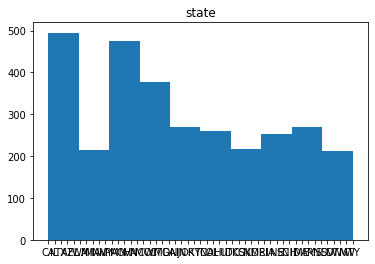

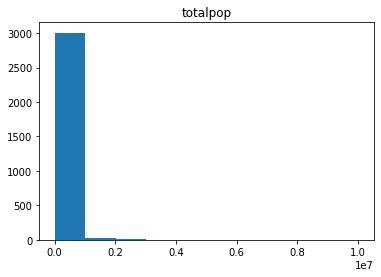

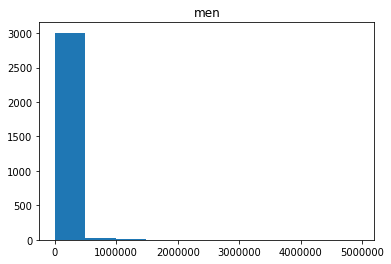

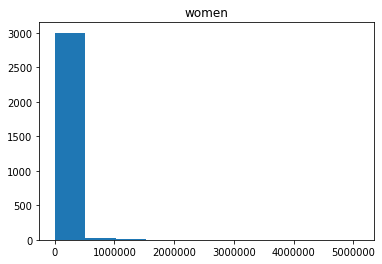

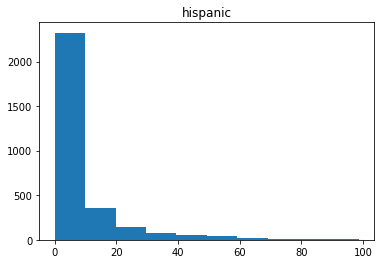

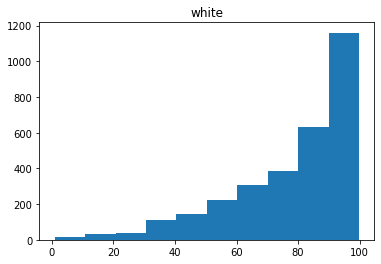

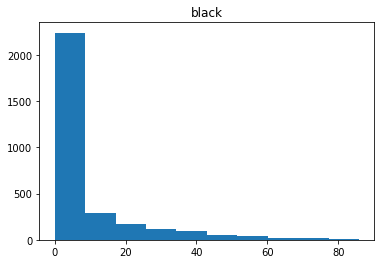

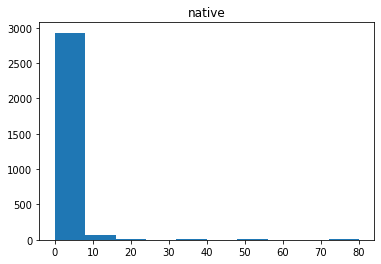

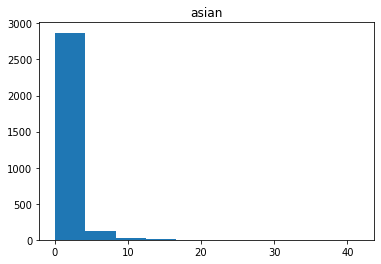

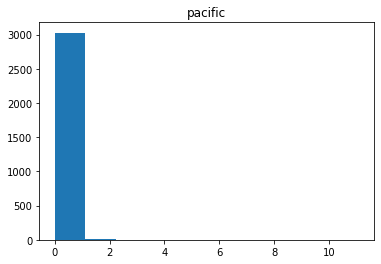

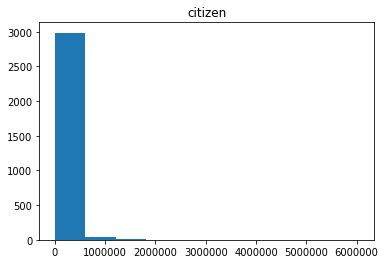

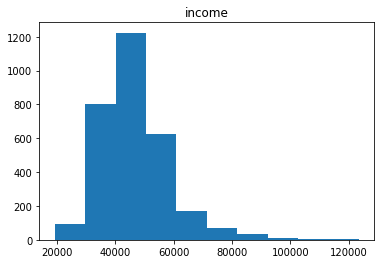

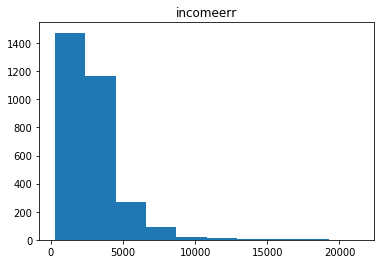

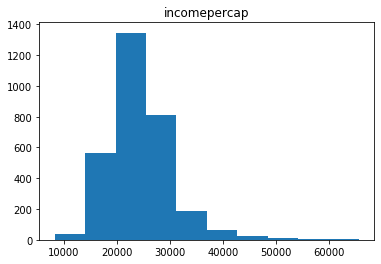

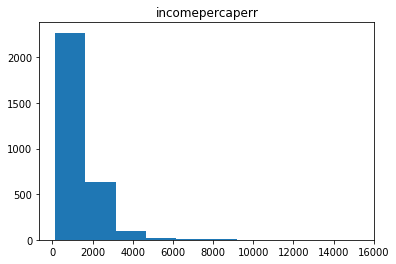

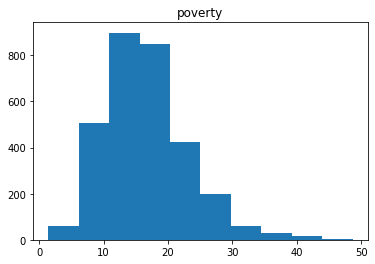

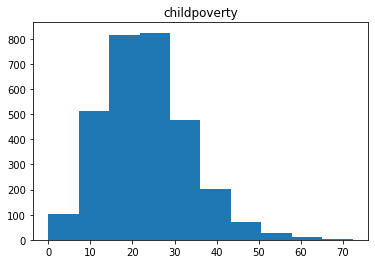

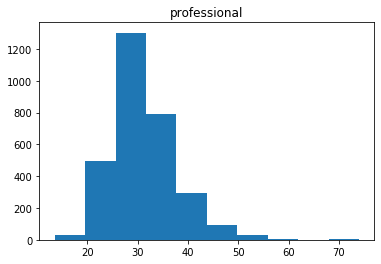

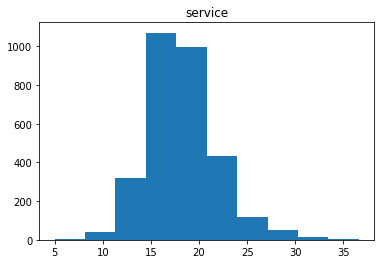

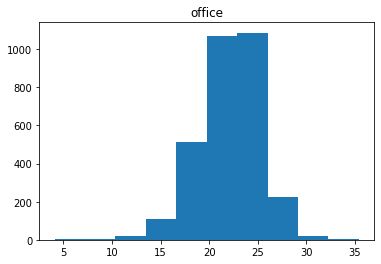

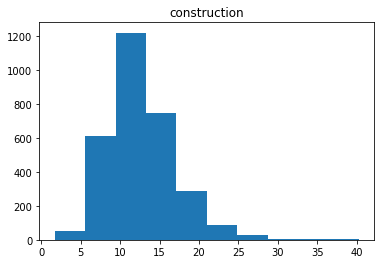

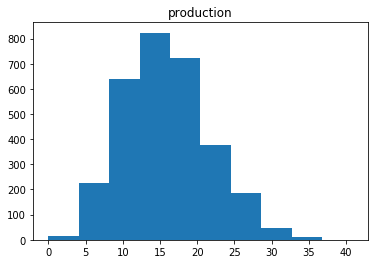

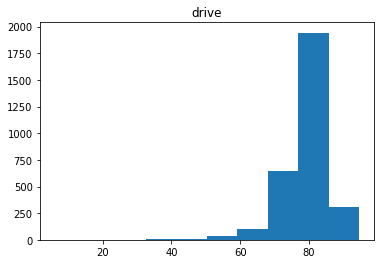

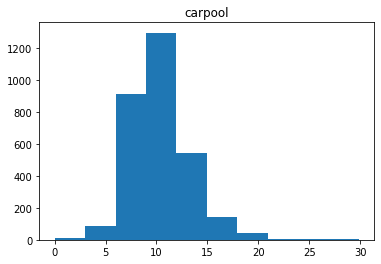

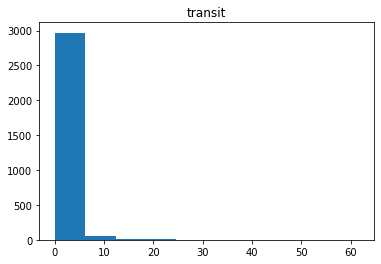

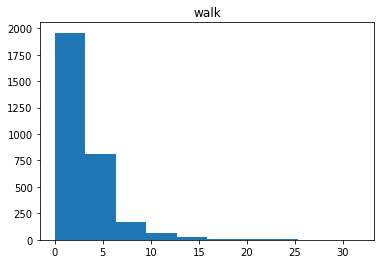

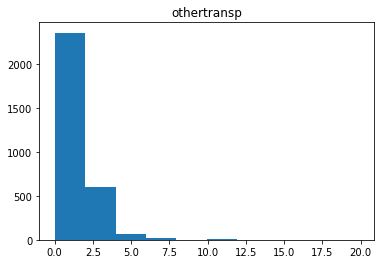

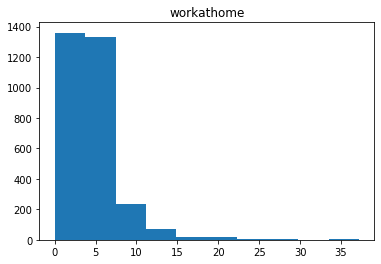

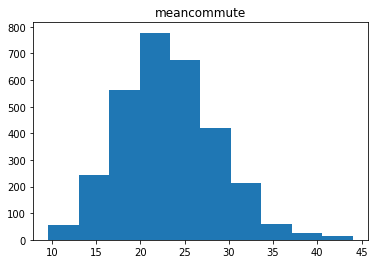

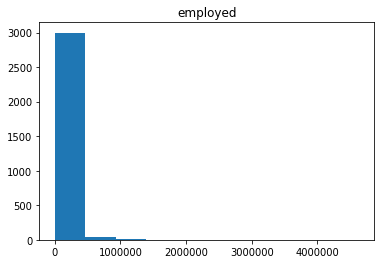

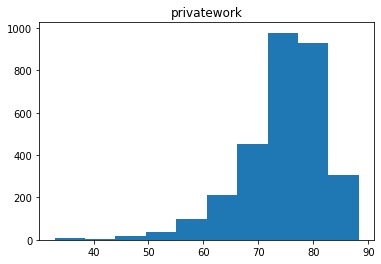

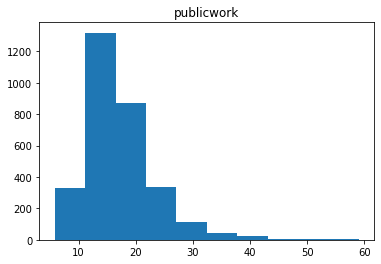

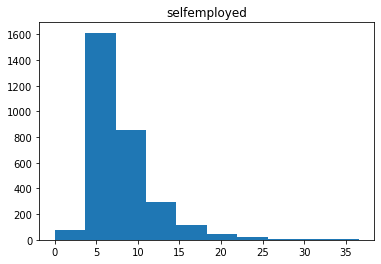

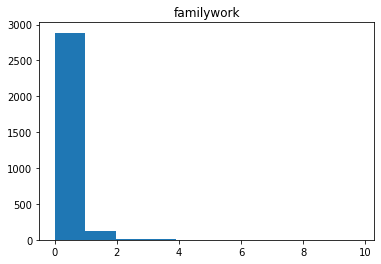

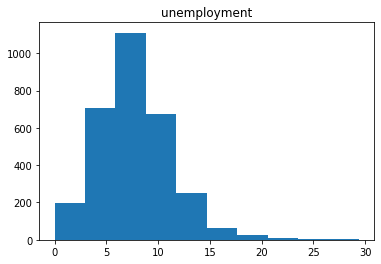

In [4]:
# distributions of all features
# means make sense for the features, some are highly correlated so will have to remove some or convert to percentages

for feature in data.columns[2:]:
    plt.hist(data[feature])
    plt.title(feature)
    plt.show()

In [5]:
# number of counties in each state

# high representation of red-leaning states (top 5 are TX, GA, VA, KY, MO)
num_counties = data['state'].value_counts()
num_counties

TX    253
GA    159
VA    133
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
OK     77
AR     75
WI     72
PA     67
FL     67
AL     67
SD     65
CO     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     32
UT     29
MD     24
WY     23
NJ     21
NV     17
ME     16
AZ     15
VT     14
MA     14
NH     10
CT      8
RI      5
HI      4
DE      3
DC      1
Name: state, dtype: int64

In [6]:
# correlation matrix

corr = data.corr()
corr

,totalpop,men,women,hispanic,white,black,native,asian,pacific,citizen,income,incomeerr,incomepercap,incomepercaperr,poverty,childpoverty,professional,service,office,construction,production,drive,carpool,transit,walk,othertransp,workathome,meancommute,employed,privatework,publicwork,selfemployed,familywork,unemployment
totalpop,1.000000,0.999879,0.999888,0.191053,-0.247540,0.077858,-0.043641,0.488371,0.063749,0.996394,0.247279,-0.272469,0.250767,-0.241270,-0.056053,-0.050112,0.247450,0.005730,0.196424,-0.266238,-0.190426,-0.129124,-0.088018,0.403449,-0.044623,0.073677,-0.032401,0.158622,0.997665,0.198249,-0.141986,-0.150505,-0.087820,0.055383
men,0.999879,1.000000,0.999534,0.192351,-0.246906,0.075293,-0.043491,0.489563,0.065645,0.995845,0.248006,-0.272001,0.249797,-0.241004,-0.056774,-0.051053,0.246138,0.005937,0.195680,-0.264495,-0.189964,-0.127034,-0.086340,0.397387,-0.045262,0.074262,-0.032027,0.157682,0.997514,0.197279,-0.141013,-0.150159,-0.087659,0.054719
women,0.999888,0.999534,1.000000,0.189759,-0.248093,0.080312,-0.043776,0.487112,0.061907,0.996695,0.246521,-0.272859,0.251645,-0.241473,-0.055347,-0.049194,0.248656,0.005530,0.197096,-0.267856,-0.190828,-0.131107,-0.089614,0.409196,-0.043997,0.073097,-0.032754,0.159492,0.997583,0.199139,-0.142891,-0.150805,-0.087955,0.056009
hispanic,0.191053,0.192351,0.189759,1.000000,-0.628521,-0.100513,-0.032234,0.149512,0.039243,0.177348,0.044438,0.092572,-0.051373,0.065955,0.094398,0.084669,-0.091038,0.173166,-0.024726,0.251122,-0.177707,-0.146846,0.238160,0.115657,-0.020110,0.135696,-0.046900,-0.114041,0.182140,-0.074393,0.115015,-0.030992,-0.022299,0.021829
white,-0.247540,-0.246906,-0.248093,-0.628521,1.000000,-0.615509,-0.237351,-0.273767,-0.113655,-0.243113,0.118300,0.042328,0.203197,0.061946,-0.454797,-0.436923,0.065686,-0.284304,-0.059980,-0.000659,0.135892,0.078010,-0.195853,-0.212656,0.106936,-0.138971,0.177785,-0.038174,-0.239567,0.136151,-0.332253,0.236872,0.093960,-0.415576
black,0.077858,0.075293,0.080312,-0.100513,-0.615509,1.000000,-0.093383,0.030005,-0.046425,0.083629,-0.259567,-0.099337,-0.254254,-0.087831,0.461006,0.474896,-0.123764,0.153206,0.121779,-0.182704,0.112594,0.146843,0.041685,0.091725,-0.191977,0.027175,-0.285635,0.200075,0.073268,0.032227,0.167787,-0.301681,-0.138772,0.475454
native,-0.043641,-0.043491,-0.043776,-0.032234,-0.237351,-0.093383,1.000000,-0.049336,0.026151,-0.047252,-0.096205,0.019957,-0.141981,-0.014546,0.241398,0.192340,0.067529,0.139778,-0.110983,0.037719,-0.130130,-0.143400,0.030673,-0.013606,0.122610,0.001659,0.185305,-0.133181,-0.045530,-0.377942,0.404719,0.089533,0.110445,0.184687
asian,0.488371,0.489563,0.487112,0.149512,-0.273767,0.030005,-0.049336,1.000000,0.448787,0.498459,0.445961,-0.224296,0.410165,-0.213601,-0.133930,-0.167166,0.414407,-0.001797,0.134770,-0.339876,-0.285183,-0.231740,-0.082861,0.481064,0.041339,0.152457,0.003528,0.120493,0.504099,0.136108,-0.050678,-0.170547,-0.098991,-0.010767
pacific,0.063749,0.065645,0.061907,0.039243,-0.113655,-0.046425,0.026151,0.448787,1.000000,0.066215,0.069553,-0.022998,0.028539,-0.043288,-0.021892,-0.034022,0.019361,0.105272,0.024315,-0.016341,-0.088163,-0.088957,0.060231,0.037954,0.039491,0.066973,0.039790,-0.023054,0.062635,-0.046781,0.058702,-0.002371,0.014002,-0.000404
citizen,0.996394,0.995845,0.996695,0.177348,-0.243113,0.083629,-0.047252,0.498459,0.066215,1.000000,0.261787,-0.292079,0.271112,-0.258132,-0.065060,-0.058200,0.268267,0.004086,0.213438,-0.291340,-0.203414,-0.124547,-0.101497,0.412133,-0.047689,0.074674,-0.036293,0.162024,0.995257,0.214340,-0.151105,-0.166397,-0.095248,0.057459


In [11]:
# look at correlation between poverty, and transit

#low corr
corr_pov = data[['poverty', 'transit']].corr()
corr_pov

,poverty,transit
poverty,1.000000,-0.040232
transit,-0.040232,1.000000


In [13]:
# corr between transit features

# high corr between walk and drive
# high corr walk and mean commute
corr_transit = data[['drive', 'carpool', 'transit', 'walk', 'othertransp', 'meancommute']].corr()
corr_transit

,drive,carpool,transit,walk,othertransp,meancommute
drive,1.000000,-0.290034,-0.513236,-0.700116,-0.379841,0.132357
carpool,-0.290034,1.000000,-0.113006,-0.087454,0.044330,0.096473
transit,-0.513236,-0.113006,1.000000,0.171327,0.155653,0.201801
walk,-0.700116,-0.087454,0.171327,1.000000,0.214369,-0.392976
othertransp,-0.379841,0.044330,0.155653,0.214369,1.000000,-0.103755
meancommute,0.132357,0.096473,0.201801,-0.392976,-0.103755,1.000000


In [19]:
# corr between income features

corr_income = data[['income',
       'incomeerr', 'incomepercap', 'incomepercaperr', 'poverty',
       'childpoverty']].corr()

# use income (average county income) as income feature, high correlation with incomepercap, poverty, and child poverty
corr_income

,income,incomeerr,incomepercap,incomepercaperr,poverty,childpoverty
income,1.000000,-0.027544,0.875445,-0.058005,-0.756107,-0.718073
incomeerr,-0.027544,1.000000,0.014353,0.695028,-0.086507,-0.111345
incomepercap,0.875445,0.014353,1.000000,0.105179,-0.726086,-0.683342
incomepercaperr,-0.058005,0.695028,0.105179,1.000000,-0.103399,-0.120736
poverty,-0.756107,-0.086507,-0.726086,-0.103399,1.000000,0.920500
childpoverty,-0.718073,-0.111345,-0.683342,-0.120736,0.920500,1.000000


In [23]:
# corr between employment features

# % private work vs. combined % public work, self employed, family work
# % unemployment
# high corr selfemployed and familywork and workathome so won't use workathome

corr_emp = data[['employed', 'privatework', 'publicwork',
       'selfemployed', 'familywork', 'unemployment', 'workathome']].corr()
corr_emp[abs(corr_emp) > 0.3]

,employed,privatework,publicwork,selfemployed,familywork,unemployment,workathome
employed,1.0,NaN,NaN,NaN,NaN,NaN,NaN
privatework,NaN,1.000000,-0.83527,-0.591455,-0.343598,NaN,-0.468692
publicwork,NaN,-0.835270,1.00000,NaN,NaN,NaN,NaN
selfemployed,NaN,-0.591455,NaN,1.000000,0.391297,-0.341042,0.682306
familywork,NaN,-0.343598,NaN,0.391297,1.000000,NaN,0.380213
unemployment,NaN,NaN,NaN,-0.341042,NaN,1.000000,NaN
workathome,NaN,-0.468692,NaN,0.682306,0.380213,NaN,1.000000


In [24]:
# corr between type of work

# high correlation between professional and production
# moderate correlation between office and construction
# moderate correlation between professional and construction

# use % professional, % service, % office since all of those are low correlated with each other but
    # high correlated with construction and production
    
corr_work = data[['professional', 'service', 'office', 'construction',
       'production', 'workathome']].corr()
corr_work

,professional,service,office,construction,production,workathome
professional,1.000000,-0.266437,-0.001822,-0.378385,-0.674328,0.399556
service,-0.266437,1.000000,-0.024710,-0.120061,-0.221344,-0.117005
office,-0.001822,-0.024710,1.000000,-0.441863,-0.197373,-0.241719
construction,-0.378385,-0.120061,-0.441863,1.000000,-0.000303,0.163769
production,-0.674328,-0.221344,-0.197373,-0.000303,1.000000,-0.365261
workathome,0.399556,-0.117005,-0.241719,0.163769,-0.365261,1.000000


In [25]:
# count of counties that voted for each candidate (check if balanced dataset)

# not a balanced dataset, many more counties went for Donald Trump
# makes sense because Hillary Clinton won fewer but more populated counties and states

# may need to downsample Donald Trump counties when training model
data.lead.value_counts()

Donald Trump       2570
Hillary Clinton     475
Name: lead, dtype: int64

In [14]:
data.columns

Index(['county', 'lead', 'state', 'totalpop', 'men', 'women', 'hispanic',
       'white', 'black', 'native', 'asian', 'pacific', 'citizen', 'income',
       'incomeerr', 'incomepercap', 'incomepercaperr', 'poverty',
       'childpoverty', 'professional', 'service', 'office', 'construction',
       'production', 'drive', 'carpool', 'transit', 'walk', 'othertransp',
       'workathome', 'meancommute', 'employed', 'privatework', 'publicwork',
       'selfemployed', 'familywork', 'unemployment'],
      dtype='object')

In [9]:
# remove total pop
# use percent of population that is men as gender feature
# use percent of population that is white as race feature (white vs. people of color)
# use percent that uses transit, drives, carpools, and mean commute as transit features
# use avg income as income variable
# use professional as work type variable (% of population who are white collar workers)
# use percent private work, percent public work, percent selfemployed
# use percent unemployment as employment feature